In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

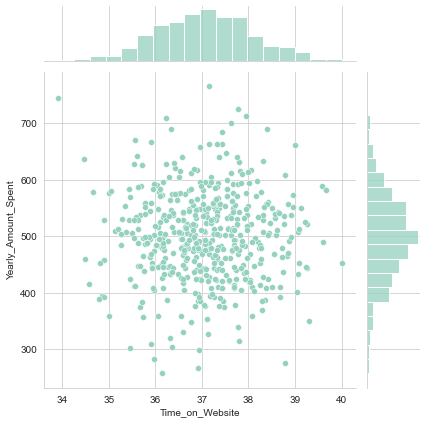

In [4]:
sns.jointplot(x = 'Time_on_Website', y = 'Yearly_Amount_Spent', data = df)


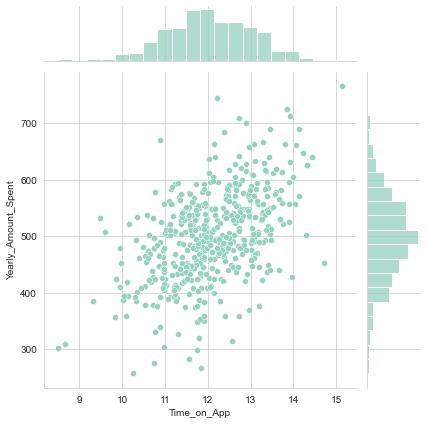

In [5]:
sns.jointplot(x = 'Time_on_App', y = 'Yearly_Amount_Spent', data = df)

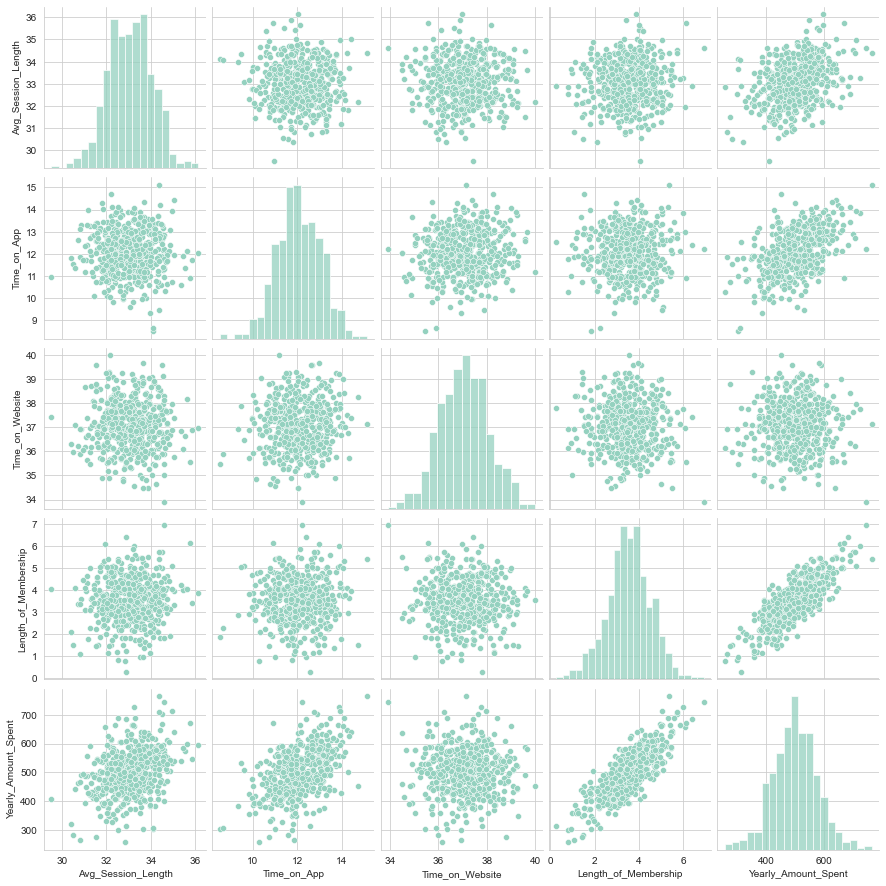

In [6]:

sns.pairplot(df)

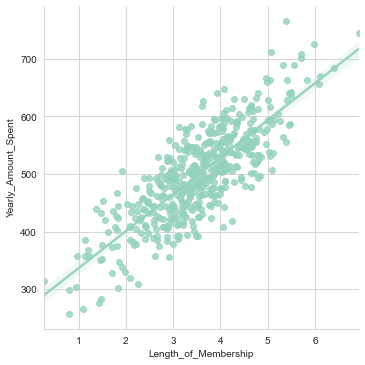

In [7]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=df)

In [8]:
X = df.iloc[:, 3:7]
#x
y = df['Yearly_Amount_Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly_Amount_Spent, Length: 500, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(350, 4)
(350,)
(150, 4)
(150,)


In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

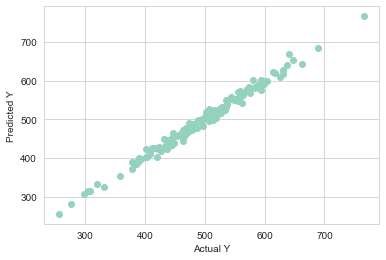

In [12]:
plt.scatter(y_test, reg.predict(X_test), label = 'TestData')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

Compute Root Mean Sqaure Error


In [13]:
y_pred =reg.predict(X_test)

#print('RMSE:', round( np.sqrt(metrics.mean_squared_error(y_test, predictions)),2) )
print('RMSE:',  round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


RMSE: 8.994


In [14]:
#reg.coef_
#X.columns

coeffecients = pd.DataFrame(reg.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,25.827920
Time_on_App,38.809001
Time_on_Website,0.281743
Length_of_Membership,61.304799
